<a href="https://colab.research.google.com/github/ashiqu-ali/eye-disease-detection/blob/main/eye_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# api command for dataset
!kaggle datasets download -d ashiquali/eye-disease-dataset

eye-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#extract zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/eye-disease-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator

In [29]:
# variables
test_data = '/content/dataset/test'
train_data = '/content/dataset/train'
epochs = 50
batchSize = 8

In [8]:
# Preprocessing and data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(test_data, target_size=(224, 224), batch_size=batchSize, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(train_data, target_size=(224, 224), batch_size=batchSize, class_mode='categorical')

Found 64 images belonging to 4 classes.
Found 192 images belonging to 4 classes.


In [9]:
# Load the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [10]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# Convolutional layers with max pooling
conv_layers = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
])

In [16]:
# Fully connected layers
fully_connected_layers = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [17]:
# Combine layers into the model
model = tf.keras.models.Sequential([
    conv_layers,
    fully_connected_layers
])

In [30]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/50
8/8 [==============================] - 202s 28s/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 1.5313 - val_accuracy: 0.6562
Epoch 2/50
8/8 [==============================] - 255s 35s/step - loss: 0.0529 - accuracy: 0.9844 - val_loss: 1.2507 - val_accuracy: 0.6562
Epoch 3/50
8/8 [==============================] - 255s 35s/step - loss: 0.0384 - accuracy: 0.9844 - val_loss: 1.2700 - val_accuracy: 0.6771
Epoch 4/50
8/8 [==============================] - 252s 35s/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 2.3965 - val_accuracy: 0.5833
Epoch 5/50
8/8 [==============================] - 253s 35s/step - loss: 0.0777 - accuracy: 0.9844 - val_loss: 2.4938 - val_accuracy: 0.5729
Epoch 6/50
8/8 [==============================] - 254s 35s/step - loss: 0.2936 - accuracy: 0.9375 - val_loss: 2.4617 - val_accuracy: 0.5312
Epoch 7/50
8/8 [==============================] - 256s 36s/step - loss: 0.1621 - accuracy: 0.9219 - val_loss: 1.6087 - val_accuracy: 0.6615
Epoch 8/50
8/8 [====

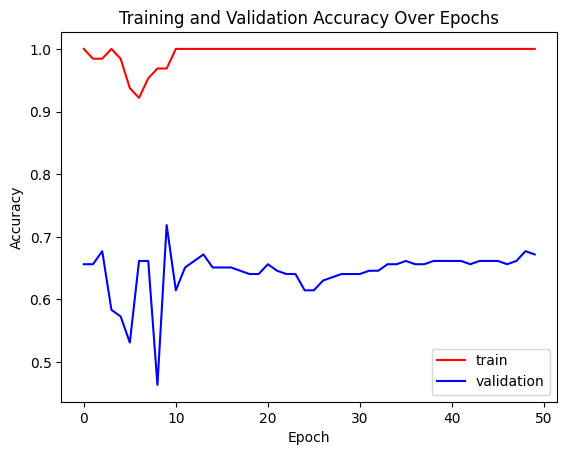

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

In [32]:
# Save the model
model.save('model.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Accuracy:', test_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 146s 6s/step - loss: 1.3134 - accuracy: 0.6719
Test Accuracy: 0.671875
